# Miniproject #1: Classification and Regression

In [11]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from mp1 import (generate_dataset_classification, 
                 generate_a_disk, 
                 generate_test_set_classification,
                 generate_dataset_regression,
                 visualize_prediction,
                 generate_dataset_denoising)
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, UpSampling2D
from keras.models import Sequentialxz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##  Simple Classification

In [79]:
X_train, Y_train = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


### Classification with SGD

In [91]:
model = Sequential()
model.add(Dense(units=30, activation='linear', input_dim=5184))
model.add(Dense(units=3, activation='linear'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(), 
              metrics=[keras.metrics.categorical_accuracy])

model.fit(X_train, keras.utils.to_categorical(Y_train), epochs=10, batch_size=32)

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 1.2345 - categorical_accuracy: 0.3767
Epoch 2/10
300/300 [==============================] - 0s 185us/step - loss: 1.1371 - categorical_accuracy: 0.3533
Epoch 3/10
300/300 [==============================] - 0s 254us/step - loss: 1.1317 - categorical_accuracy: 0.3533
Epoch 4/10
300/300 [==============================] - 0s 202us/step - loss: 1.1267 - categorical_accuracy: 0.3533
Epoch 5/10
300/300 [==============================] - 0s 206us/step - loss: 1.1224 - categorical_accuracy: 0.3533
Epoch 6/10
300/300 [==============================] - 0s 169us/step - loss: 1.1192 - categorical_accuracy: 0.3533
Epoch 7/10
300/300 [==============================] - 0s 180us/step - loss: 1.1162 - categorical_accuracy: 0.3533
Epoch 8/10
300/300 [==============================] - 0s 225us/step - loss: 1.1134 - categorical_accuracy: 0.3533
Epoch 9/10
300/300 [==============================] - 0s 250us/step - loss: 1.1110 - categ

### Classification with ADAM

In [92]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(), 
              metrics=[keras.metrics.categorical_accuracy])

model.fit(X_train, keras.utils.to_categorical(Y_train), epochs=10, batch_size=32)

Epoch 1/10
300/300 [==============================] - 2s 7ms/step - loss: 1.1093 - categorical_accuracy: 0.2867
Epoch 2/10
300/300 [==============================] - 0s 185us/step - loss: 1.0647 - categorical_accuracy: 0.5800
Epoch 3/10
300/300 [==============================] - 0s 181us/step - loss: 1.0391 - categorical_accuracy: 0.6533
Epoch 4/10
300/300 [==============================] - 0s 178us/step - loss: 1.1542 - categorical_accuracy: 0.5833
Epoch 5/10
300/300 [==============================] - 0s 367us/step - loss: 3.1448 - categorical_accuracy: 0.6333
Epoch 6/10
300/300 [==============================] - 0s 311us/step - loss: 1.1747 - categorical_accuracy: 0.6633
Epoch 7/10
300/300 [==============================] - 0s 233us/step - loss: 1.1552 - categorical_accuracy: 0.6200
Epoch 8/10
300/300 [==============================] - 0s 236us/step - loss: 1.1470 - categorical_accuracy: 0.6200
Epoch 9/10
300/300 [==============================] - 0s 226us/step - loss: 1.1421 - categ

Adam converges on the first epoch (faster than SGD).

##  Visualization of the Solution

We visualize 25 random weights from the first layer.

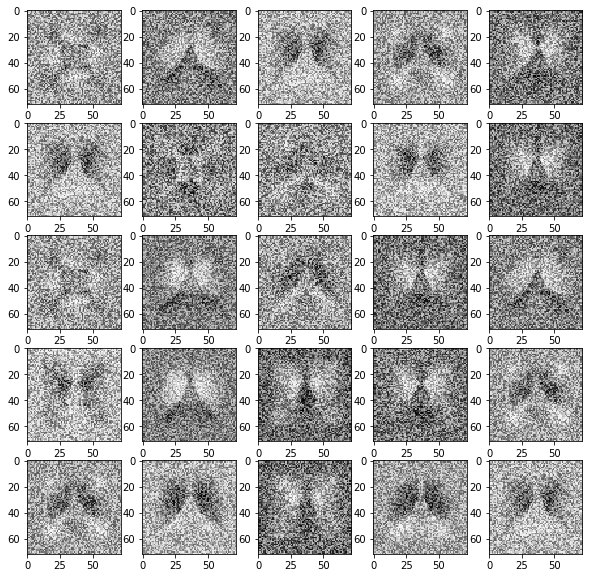

In [93]:
n = 5
fig, ax = plt.subplots(n, n, figsize=(10, 10))

for i in range(n):
    for j in range(n):
        p = np.random.randint(model.get_weights()[0].shape[1])
        im = model.get_weights()[0][:, p]
        reshaped_image = im.reshape(72, 72)
        ax[i, j].imshow(reshaped_image, cmap=plt.get_cmap('Greys'))


## A More Difficult Classification Problem

In [94]:
X_train, Y_train = generate_dataset_classification(1000, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [98]:
model_conv = Sequential()
model_conv.add(Conv2D(16, 5, activation='relu', input_shape=(72, 72, 1)))
model_conv.add(MaxPool2D())
model_conv.add(Flatten())
model_conv.add(Dense(units=3, activation='tanh'))

model_conv.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(), 
              metrics=[keras.metrics.categorical_accuracy])

model_conv.fit(X_train.reshape(-1, 72, 72, 1), keras.utils.to_categorical(Y_train), epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 6s 6ms/step - loss: 1.2601 - categorical_accuracy: 0.3550
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0986 - categorical_accuracy: 0.3370
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0986 - categorical_accuracy: 0.3370
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0986 - categorical_accuracy: 0.3370
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0986 - categorical_accuracy: 0.3370
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0986 - categorical_accuracy: 0.3370
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.0986 - categorical_accuracy: 0.3370
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0986 - categorical_accuracy: 0.3370
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0986 - cat

In [110]:
X_test, Y_test = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [111]:
model_conv.evaluate(X_test.reshape(-1, 72, 72, 1), Y_test)

300/300 [==============================] - 2s 6ms/step


[1.0986123085021973, 0.34000000009934106]

The loss on this dataset is lower than on the previous dataset with a linear classifier. 

We can visualize the convolutional weights learned by the network.

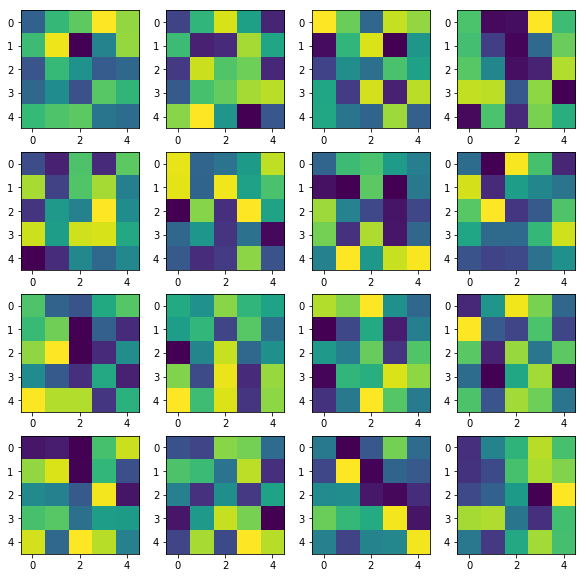

In [100]:
n = 4
fig, ax = plt.subplots(n, n, figsize=(10, 10))
for i in range(n):
    for j in range(n):
        im = model_conv.get_weights()[0][:,:, 0, n*i + j]

        ax[i, j].imshow(im)

## A Regression Problem

In [101]:
[X_train, Y_train] = generate_dataset_regression(900, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890


In [102]:
Y_train = Y_train.reshape(-1, 3, 2)
for i in range(Y_train.shape[0]):
    sample = np.array(sorted(Y_train[i, :, :], key=lambda x: x[0]))
    Y_train[i, :, :] = sample
    
Y_train = Y_train.reshape(-1, 6)

In [103]:
model_reg = Sequential()
model_reg.add(Conv2D(32, 5, activation='relu', input_shape=(72, 72, 1)))
model_reg.add(MaxPool2D())
model_reg.add(Conv2D(64, 3, activation='relu'))
model_reg.add(MaxPool2D())
model_reg.add(Conv2D(128, 3, activation='relu'))
model_reg.add(MaxPool2D())
model_reg.add(Conv2D(256, 3, activation='relu'))
model_reg.add(MaxPool2D())
model_reg.add(Flatten())
model_reg.add(Dense(units=200, activation='relu'))
model_reg.add(Dense(units=100, activation='relu'))
model_reg.add(Dense(units=30, activation='relu'))
model_reg.add(Dense(units=30, activation='relu'))
model_reg.add(Dense(units=6, activation='relu'))

model_reg.compile(loss=keras.losses.mse,
                  optimizer=keras.optimizers.adam(), 
                  metrics=[keras.metrics.mean_absolute_error])

model_reg.fit(X_train.reshape(-1, 72, 72, 1), Y_train, epochs=70, batch_size=16)

Epoch 1/70
900/900 [==============================] - 13s 15ms/step - loss: 0.1678 - mean_absolute_error: 0.3195
Epoch 2/70
900/900 [==============================] - 11s 12ms/step - loss: 0.1369 - mean_absolute_error: 0.2638
Epoch 3/70
900/900 [==============================] - 13s 14ms/step - loss: 0.1272 - mean_absolute_error: 0.2402
Epoch 4/70
900/900 [==============================] - 17s 19ms/step - loss: 0.1232 - mean_absolute_error: 0.2303
Epoch 5/70
900/900 [==============================] - 18s 20ms/step - loss: 0.1206 - mean_absolute_error: 0.2233
Epoch 6/70
900/900 [==============================] - 15s 16ms/step - loss: 0.1164 - mean_absolute_error: 0.2106
Epoch 7/70
900/900 [==============================] - 13s 14ms/step - loss: 0.1133 - mean_absolute_error: 0.2010
Epoch 8/70
900/900 [==============================] - 13s 14ms/step - loss: 0.1112 - mean_absolute_error: 0.1932
Epoch 9/70
900/900 [==============================] - 15s 16ms/step - loss: 0.1106 - mean_absolu

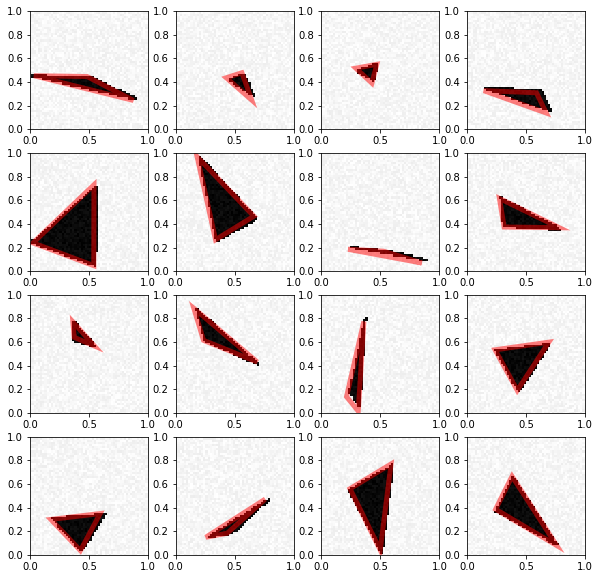

In [109]:
n = 4
fig, ax = plt.subplots(n, n, figsize=(10, 10))
ids = np.random.randint(0, len(X_train), size=(n*n))

for i in range(n):
    for j in range(n):
        visualize_prediction(X_train[ids[n*i + j], :], 
                             model_reg.predict(X_train[ids[n*i + j], :].reshape(-1, 72, 72, 1)),
                             ax[i, j])

The results are very satisfying, we can now take a look at the weights of the first convolutional layer. 

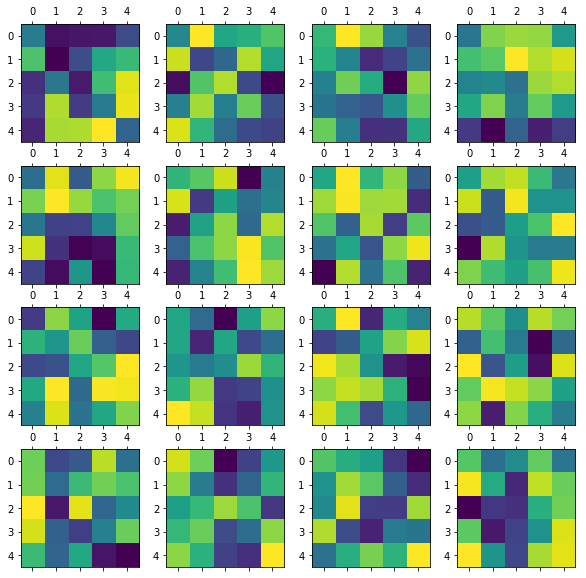

In [105]:
n = 4
fig, ax = plt.subplots(n, n, figsize=(10, 10))
ids = np.random.randint(0, model_reg.get_weights()[0].shape[-1], size=(n*n))
for i in range(n):
    for j in range(n):
        im = model_reg.get_weights()[0][:, :, :, i*n + j].reshape(5, 5)
        ax[i, j].matshow(im)


Let's test the solution on a new dataset not seen by the network.

In [106]:
[X_test, Y_test] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [107]:
Y_test = Y_test.reshape(-1, 3, 2)
for i in range(Y_test.shape[0]):
    sample = np.array(sorted(Y_test[i, :, :], key=lambda x: x[0]))
    Y_test[i, :, :] = sample
    
Y_test = Y_test.reshape(-1, 6)

In [108]:
model_reg.evaluate(X_test.reshape(-1, 72, 72, 1), Y_test)

300/300 [==============================] - 4s 13ms/step


[0.006813529071708521, 0.04920531158645948]

## Bonus Question

Implement a hourglass network for denoising.

We first generate two datasets with the new function `generate_dataset_denoising`.

In [186]:
X_train, Y_train = generate_dataset_denoising(2000, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990


In [187]:
X_test, Y_test = generate_dataset_denoising(200, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


We train a network with Max pooling and up sampling layers for denoising.

In [191]:
model_denois = Sequential()
model_denois.add(Conv2D(32, 5, activation='relu', padding="same", input_shape=(72, 72, 1)))
model_denois.add(MaxPool2D())
model_denois.add(Conv2D(64, 3, activation='relu', padding="same"))
model_denois.add(MaxPool2D())
model_denois.add(Conv2D(128, 3, activation='relu', padding="same"))
model_denois.add(MaxPool2D())
model_denois.add(Conv2D(256, 3, activation='relu', padding="same"))
model_denois.add(Conv2D(256, 3, activation='relu', padding="same"))
model_denois.add(UpSampling2D((2, 2)))
model_denois.add(Conv2D(128, 3, activation='relu', padding="same"))
model_denois.add(UpSampling2D((2, 2)))
model_denois.add(Conv2D(64, 3, activation='relu', padding="same"))
model_denois.add(UpSampling2D((2, 2)))
model_denois.add(Conv2D(32, 3, activation='relu', padding="same"))
model_denois.add(Conv2D(1, 3, activation='relu', padding="same"))


model_denois.compile(loss=keras.losses.mse,
                  optimizer=keras.optimizers.adam(), 
                  metrics=[keras.metrics.mean_absolute_error])

model_denois.fit(X_train.reshape(-1, 72, 72, 1), Y_train.reshape(-1, 72, 72, 1), epochs=15, batch_size=16)

Epoch 1/10
2000/2000 [==============================] - 110s 55ms/step - loss: 0.0669 - mean_absolute_error: 0.1280
Epoch 2/10
2000/2000 [==============================] - 101s 51ms/step - loss: 0.0072 - mean_absolute_error: 0.0368
Epoch 3/10
2000/2000 [==============================] - 103s 51ms/step - loss: 0.0045 - mean_absolute_error: 0.0268
Epoch 4/10
2000/2000 [==============================] - 102s 51ms/step - loss: 0.0046 - mean_absolute_error: 0.0339
Epoch 5/10
2000/2000 [==============================] - 108s 54ms/step - loss: 0.0030 - mean_absolute_error: 0.0228
Epoch 6/10
2000/2000 [==============================] - 106s 53ms/step - loss: 0.0025 - mean_absolute_error: 0.0195
Epoch 7/10
2000/2000 [==============================] - 96s 48ms/step - loss: 0.0024 - mean_absolute_error: 0.0223
Epoch 8/10
2000/2000 [==============================] - 112s 56ms/step - loss: 0.0023 - mean_absolute_error: 0.0238
Epoch 9/10
2000/2000 [==============================] - 117s 59ms/step - 

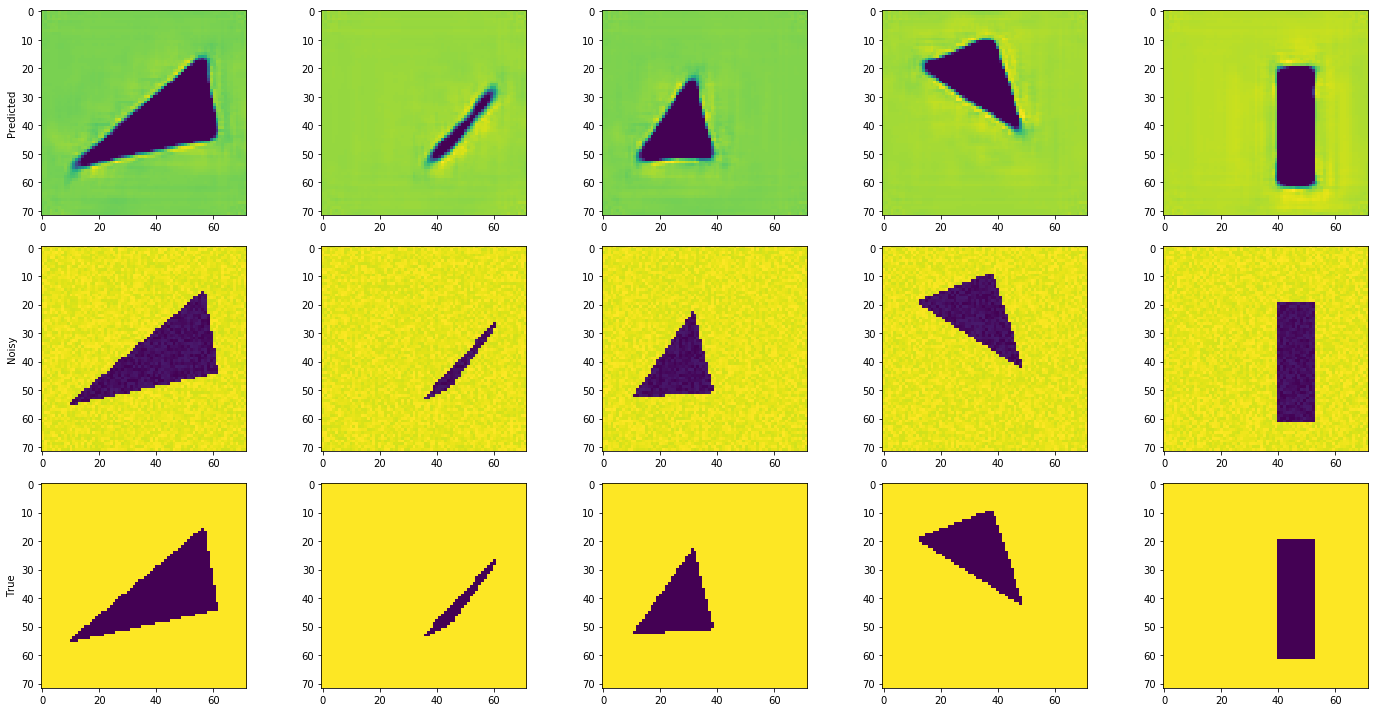

In [255]:
idx = np.random.randint(200, size=5)
fig, ax = plt.subplots(3, 5, figsize=(20, 10))

ax[0, 0].set_ylabel("Predicted")
ax[1, 0].set_ylabel("Noisy")
ax[2, 0].set_ylabel("True")

for i in range(5):
    Y = model_denois.predict(X_test[idx[i]].reshape(-1, 72, 72, 1))

    ax[0, i].imshow(Y[0, :, :, 0])
    
    ax[1, i].imshow(X_test[idx[i]].reshape(72, 72))
    
    ax[2, i].imshow(Y_test[idx[i]].reshape(72, 72))

fig.tight_layout()